# Characterization of Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Impulse Response

The response $y(t)$ of a linear time-invariant (LTI) system $\mathcal{H}$ to an arbitrary input signal $x(t)$ is derived in the following. The input signal can be represented as an integral when applying the [sifting-property of the Dirac impulse](../continuous_signals/standard_signals.ipynb#Dirac-Impulse)

\begin{equation}
x(t) = \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau
\end{equation}

Introducing above relation for the the input signal $x(t)$ into the output signal $y(t) = \mathcal{H} \{ x(t) \}$ of the system yields

\begin{equation}
y(t) = \mathcal{H} \left\{ \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau \right\}
\end{equation}

where $\mathcal{H} \{ \cdot \}$ denotes the system response operator. The integration and system response operator can be exchanged under the assumption that the system is linear

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot \mathcal{H} \left\{ \delta(t-\tau) \right\} \; d \tau 
\end{equation}

where $\mathcal{H} \{\cdot\}$ was only applied to the Dirac impulse, since $x(\tau)$ can be regarded as constant factor with respect to the time $t$. It becomes evident that the response of a system to a Dirac impulse plays an important role in the calculation of the output signal for arbitrary input signals. 

The response of a system to a Dirac impulse as input signal is denoted as [*impulse response*](https://en.wikipedia.org/wiki/Impulse_response). It is defined as

\begin{equation}
h(t) = \mathcal{H} \left\{ \delta(t) \right\}
\end{equation}

If the system is time-invariant, the response to a shifted Dirac impulse is $\mathcal{H} \left\{ \delta(t-\tau) \right\} = h(t-\tau)$. Hence, for an LTI system we finally get

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot h(t-\tau) \; d \tau 
\end{equation}

Due to its relevance in the theory of LTI systems, this operation is explicitly termed as [*convolution*](https://en.wikipedia.org/wiki/Convolution). It is commonly abbreviated by $*$, hence for above integral we get $y(t) = x(t) * h(t)$. In some books the mathematically more precise nomenclature $y(t) = (x*h)(t)$ is used, since $*$ is the operator acting on the two signals $x$ and $h$ with regard to time $t$.

In can be concluded that the properties of an LTI system are entirely characterized by its impulse response. The response $y(t)$ of a system to an arbitrary input signal $x(t)$ is given by the convolution of the input signal $x(t)$ with its impulse response $h(t)$.

**Example**

The following example considers an LTI system whose relation between input $x(t)$ and output $y(t)$ is given by an ordinary differential equation (ODE) with constant coefficients

\begin{equation}
y(t) + \frac{d}{dt} y(t) = x(t)
\end{equation}

The system response is computed for the input signal $x(t) = e^{- 2 t} \cdot \epsilon(t)$ by 

1. explicitly solving the ODE and by 
2. computing the impulse response $h(t)$ and convolution with the input signal.

The solution should fulfill the initial conditions $y(t)\big\vert_{t = 0-} = 0$ and $\frac{d}{dt}y(t)\big\vert_{t = 0-} = 0$ due to causality.

First the ODE is defined in `SymPy`

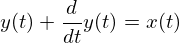

In [1]:
import sympy as sym
%matplotlib inline
sym.init_printing()

t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t), x)
ode

The ODE is solved for the given input signal in order to calculate the output signal. The integration constant is calculated such that the solution fulfills the initial conditions

In [2]:
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))
integration_constants = sym.solve(
    (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1')
y1 = solution.subs(integration_constants)
y1

Lets plot the output signal derived by explicit solution of the ODE

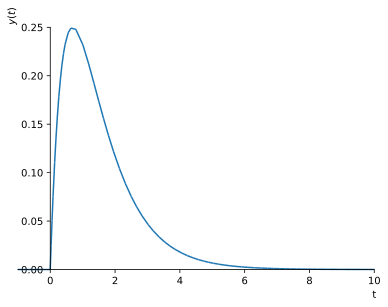

In [3]:
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');

The impulse response $h(t)$ is computed by solving the ODE for a Dirac impulse as input signal, $x(t) = \delta(t)$

In [4]:
h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))
integration_constants = sym.solve((solution2.rhs.limit(
    t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1')
h = solution2.subs(integration_constants)
h

Lets plot the impulse response $h(t)$ of the LTI system

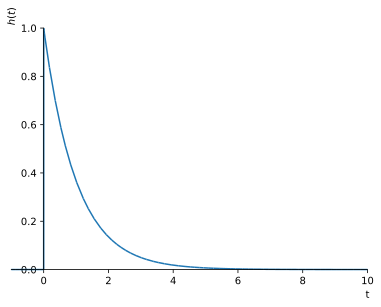

In [5]:
sym.plot(h.rhs, (t,-1,10), ylabel=r'$h(t)$');

As alternative to the explicit solution of the ODE, the system response is computed by evaluating the convolution $y(t) = x(t) * h(t)$. Since `SymPy` cannot handle the Heaviside function properly in integrands, the convolution integral is first simplified. Both the input signal $x(t)$ and the impulse response $h(t)$ are causal signals. Hence, the convolution integral degenerates to

\begin{equation}
y(t) = \int_{0}^{t} x(\tau) \cdot h(t - \tau) \; d\tau
\end{equation}

for $t \geq 0$. Note that $y(t) = 0$ for $t<0$.

In [6]:
tau = sym.symbols('tau', real=True)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(t, t-tau), (tau, 0, t))
y2

Lets plot the output signal derived by evaluation of the convolution

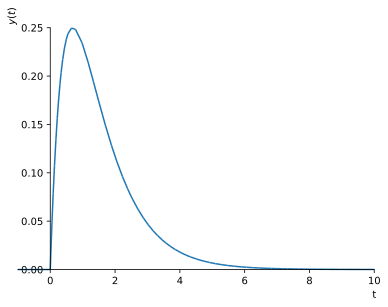

In [7]:
sym.plot(y2, (t,-1,10), ylabel=r'$y(t)$');

**Exercise**

* Compare the output signal derived by explicit solution of the ODE with the signal derived by convolution. Are both equal?
* Check if the impulse response $h(t)$ is a solution of the ODE by manual calculation. Hint $\frac{d}{dt} \epsilon(t) = \delta(t)$.
* Check the solution of the convolution integral by manual calculation including the Heaviside functions.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.